Insights for the Regression Project


**Data Cleaning and Feature Engineering**

**Before building the models, crucial preprocessing steps were performed:**

1. Handling Mixed Data Types: Numerical values were extracted from columns like mileage, engine, and max_power, which contained units.

2. Missing Value Imputation: Missing data in these numerical columns was filled with the median, a robust method less affected by outliers.

3. Feature Creation: A new feature, car_age, was engineered by subtracting the year from the current year, providing a direct measure of vehicle depreciation.

4. Outlier Removal: Outliers in selling_price were removed to ensure the models were not biased by a few extremely high-priced cars.

5. Feature Scaling: All features were scaled using StandardScaler, a vital step for models like Linear Regression and SVR to ensure all variables contribute equally.

**Model Performance and Evaluation**

Multiple regression models were trained and evaluated using key metrics: R-squared (R2), Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE).

Model	Test (R²):

Linear Regression: 0.806

Ridge Regression:	0.847

**Random Forest:	0.931**

SVR:	0.887

XGBoost:	0.920

**Linear & Ridge Regression:** These models served as a good baseline but were outperformed by more complex algorithms, suggesting a non-linear relationship between car features and price.

**Ensemble Models (Random Forest & XGBoost):** The Random Forest Regressor and XGBoost Regressor proved to be the most accurate. They are particularly effective at capturing complex, non-linear patterns in the data.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score



In [ ]:
# Upload CSV
from google.colab import files
uploaded = files.upload()

# Load Data
df = pd.read_csv(next(iter(uploaded)))
df.head()


Saving Car details v3.csv to Car details v3.csv


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [ ]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [ ]:
df.shape


(8128, 13)

In [ ]:
df = df.drop_duplicates().reset_index(drop=True)


In [ ]:
df.isnull().sum()


,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,208
engine,208


In [ ]:
import pandas as pd
import numpy as np
import re

# Convert to numeric and extract numbers
df['mileage'] = pd.to_numeric(df['mileage'].astype(str).str.extract(r'(\d+\.?\d*)')[0], errors='coerce')
df['mileage'] = df['mileage'].fillna(df['mileage'].median())

df['engine'] = pd.to_numeric(df['engine'].astype(str).str.extract(r'(\d+\.?\d*)')[0], errors='coerce')
df['engine'] = df['engine'].fillna(df['engine'].median())

df['max_power'] = pd.to_numeric(df['max_power'].astype(str).str.extract(r'(\d+\.?\d*)')[0], errors='coerce')
df['max_power'] = df['max_power'].fillna(df['max_power'].median())




In [ ]:
# Seats - fill with mode (most common seat count)
df['seats'] = pd.to_numeric(df['seats'], errors='coerce')
mode_seats = df['seats'].mode()
df['seats'] = df['seats'].fillna(mode_seats[0] if not mode_seats.empty else 5)
print(df[['mileage', 'engine', 'max_power', 'torque', 'seats']].isna().sum())


mileage        0
engine         0
max_power      0
torque       209
seats          0
dtype: int64


In [ ]:
df = df.dropna(subset=['torque'])


In [ ]:
# Car age
df['car_age'] = 2025 - df['year']
df.drop('year', axis=1, inplace=True)

df['brand'] = df['name'].str.split().str[0]


In [ ]:
# Drop unwanted columns
df.drop(['name'], axis=1, inplace=True)



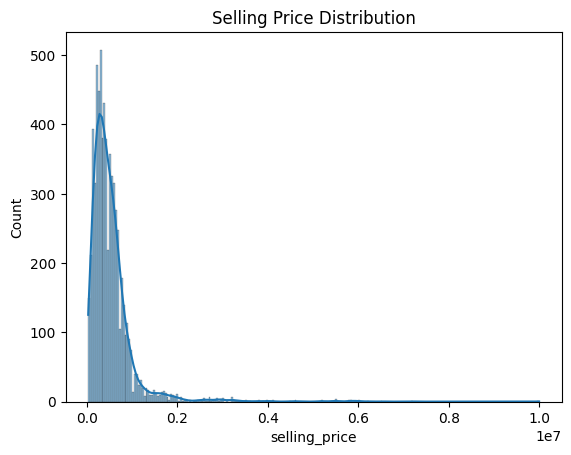

In [ ]:
import seaborn as sns

# Distribution of Selling Price
sns.histplot(df['selling_price'], kde=True)
plt.title("Selling Price Distribution")
plt.show()


In [ ]:
print(df.columns)


Index(['selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission',
       'owner', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'car_age',
       'brand'],
      dtype='object')


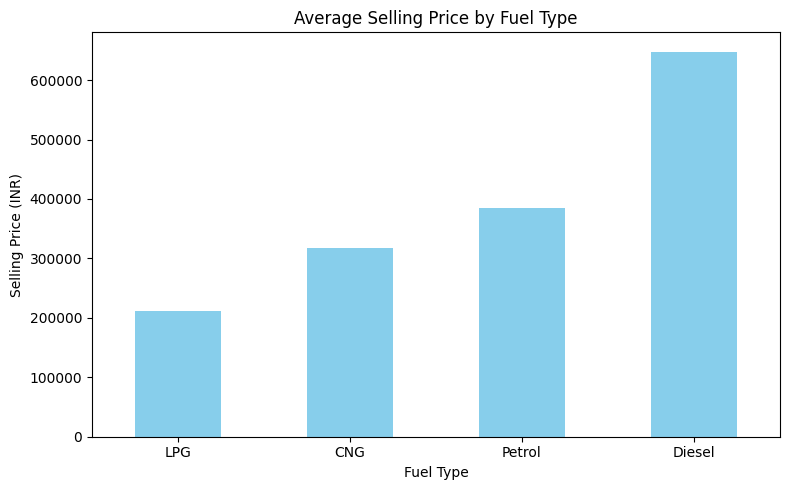

In [ ]:
fuel_price = df.groupby('fuel')['selling_price'].mean().sort_values()

fuel_price.plot(kind='bar', color='skyblue', figsize=(8, 5))
plt.title("Average Selling Price by Fuel Type")
plt.ylabel("Selling Price (INR)")
plt.xlabel("Fuel Type")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


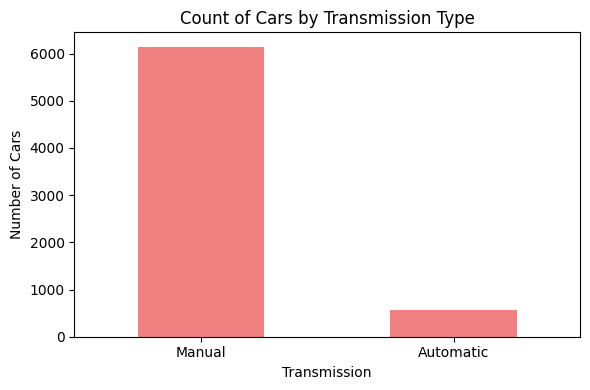

In [ ]:
df['transmission'].value_counts().plot(kind='bar', color='lightcoral', figsize=(6, 4))
plt.title("Count of Cars by Transmission Type")
plt.ylabel("Number of Cars")
plt.xlabel("Transmission")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


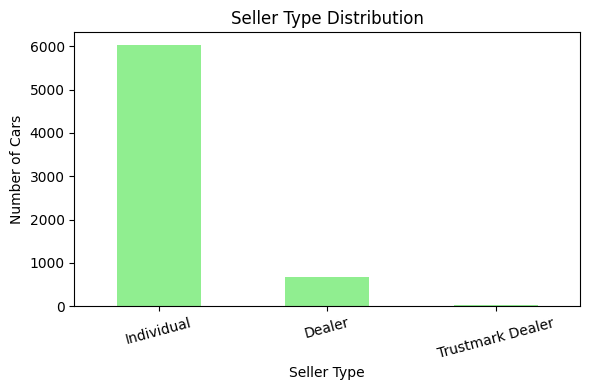

In [ ]:
df['seller_type'].value_counts().plot(kind='bar', color='lightgreen', figsize=(6, 4))
plt.title("Seller Type Distribution")
plt.ylabel("Number of Cars")
plt.xlabel("Seller Type")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


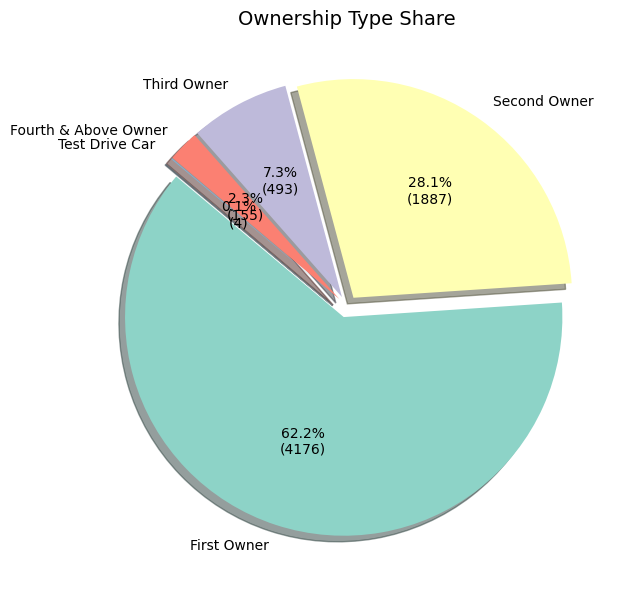

In [ ]:
owner_counts = df['owner'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(owner_counts, labels=owner_counts.index,
        autopct=lambda pct: f"{pct:.1f}%\n({int(pct/100.*owner_counts.sum())})",
        startangle=140,
        explode=[0.05]*len(owner_counts),  # Slightly separate each slice
        shadow=True,
        textprops={'fontsize': 10},
        colors=plt.cm.Set3.colors)

plt.title("Ownership Type Share", fontsize=14)
plt.tight_layout()
plt.show()


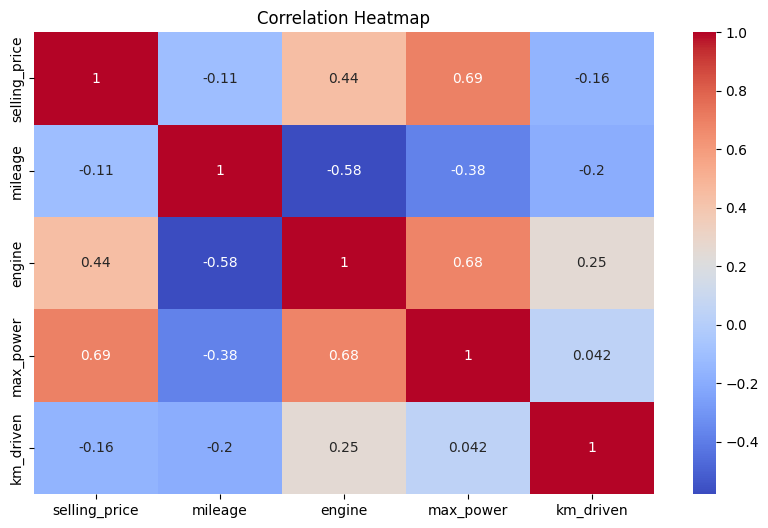

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[['selling_price', 'mileage', 'engine', 'max_power', 'km_driven']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


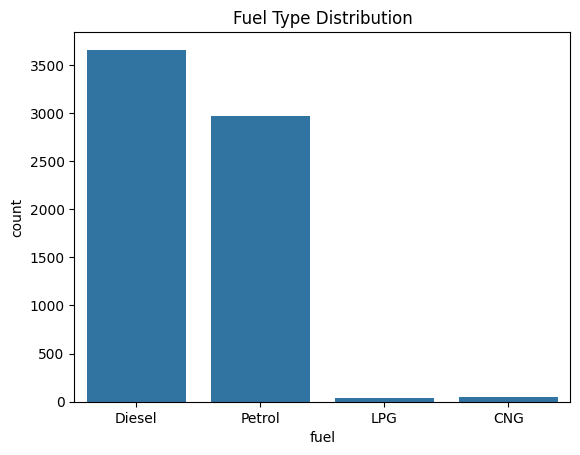

In [ ]:
sns.countplot(x='fuel', data=df)
plt.title("Fuel Type Distribution")
plt.show()


In [ ]:
# Encode Categorical Columns

df = pd.get_dummies(df, drop_first=True)


In [ ]:
df['selling_price']

,selling_price
0,450000
1,370000
2,158000
3,225000
4,130000
...,...
6921,260000
6922,475000
6923,320000
6924,135000


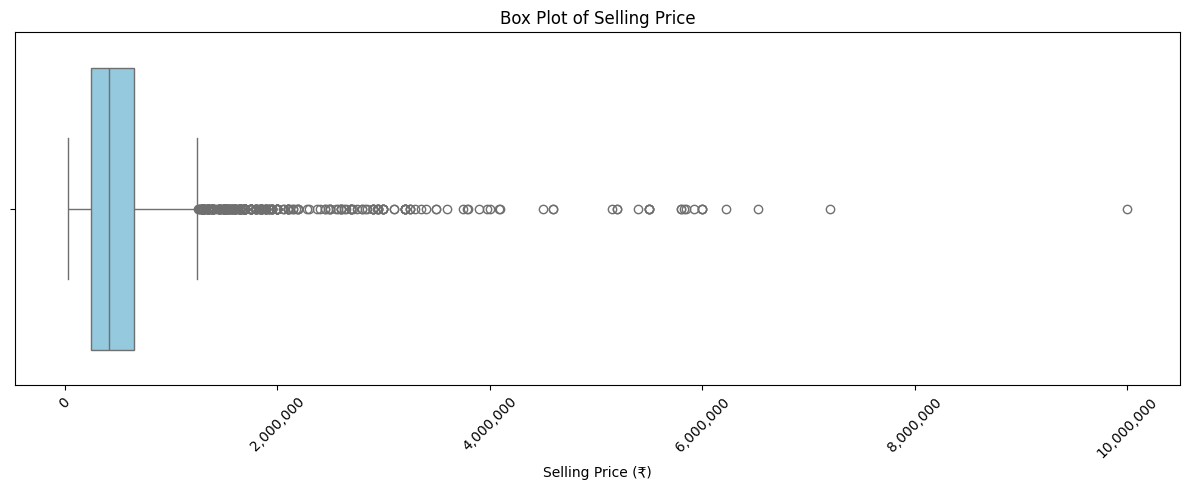

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

plt.figure(figsize=(12, 5))
sns.boxplot(x=df['selling_price'], color='skyblue')

plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.xticks(rotation=45)
plt.title('Box Plot of Selling Price')
plt.xlabel('Selling Price (₹)')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['selling_price'], axis=1)  # drop target and irrelevant
y = df['selling_price']


In [ ]:
df = df[df['selling_price'] <= 1100000]
#y_norm = (y - y.mean())/(y.std())

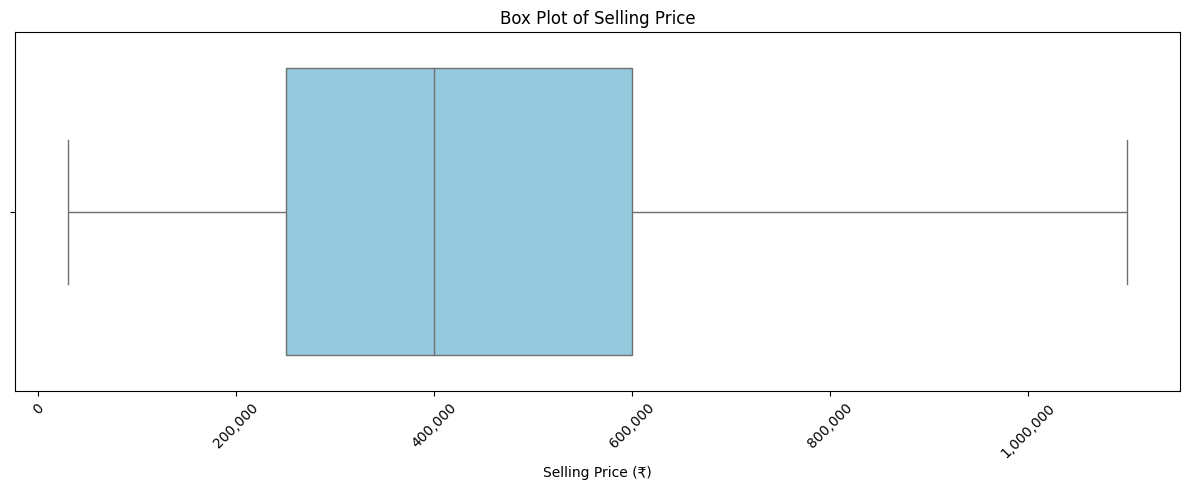

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

plt.figure(figsize=(12, 5))
sns.boxplot(x=df['selling_price'], color='skyblue')

plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.xticks(rotation=45)
plt.title('Box Plot of Selling Price')
plt.xlabel('Selling Price (₹)')
plt.tight_layout()
plt.show()


In [ ]:
# 2. Normalize target variable
y_mean = y.mean()
y_std = y.std()
y_norm = (y - y_mean) / y_std


In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_norm, test_size=0.2, random_state=42)
X_test_orig = X_test.copy()
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [ ]:

results = {}

# ----------- Linear Regression -----------
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_train = lr.predict(X_train_scaled)
y_pred_test = lr.predict(X_test_scaled)

cv_scores = cross_val_score(lr, X_train_scaled, y_train, cv=5, scoring='r2')
cv_r2 = np.mean(cv_scores)

print("\nLinear Regression:")
print("CV R²     :", round(cv_r2, 3))
print("Train R² :", round(r2_score(y_train, y_pred_train), 3))
print("Test R²  :", round(r2_score(y_test, y_pred_test), 3))
print("MAE      :", round(mean_absolute_error(y_test, y_pred_test) * y_std, 2))
print("RMSE     :", round(np.sqrt(mean_squared_error(y_test, y_pred_test)) * y_std, 2))

results["Linear Regression"] = {
    "Test R2": r2_score(y_test, y_pred_test)
}



Linear Regression:
CV R²     : 0.737
Train R² : 0.922
Test R²  : 0.806
MAE      : 100436.64
RMSE     : 206107.63


In [ ]:

# ----------- Ridge Regression -----------
param_ridge = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge = Ridge()
grid_ridge = GridSearchCV(ridge, param_ridge, cv=5, scoring='neg_mean_squared_error')
grid_ridge.fit(X_train_scaled, y_train)
best_ridge = grid_ridge.best_estimator_

cv_r2 = np.mean(cross_val_score(best_ridge, X_train_scaled, y_train, cv=5, scoring='r2'))
y_pred_train = best_ridge.predict(X_train_scaled)
y_pred_test = best_ridge.predict(X_test_scaled)

print("\nRidge Regression (with tuning):")
print("Best alpha:", grid_ridge.best_params_['alpha'])
print("CV R²     :", round(cv_r2, 3))
print("Train R² :", round(r2_score(y_train, y_pred_train), 3))
print("Test R²  :", round(r2_score(y_test, y_pred_test), 3))
print("MAE      :", round(mean_absolute_error(y_test, y_pred_test), 2))
print("RMSE     :", round(np.sqrt(mean_squared_error(y_test, y_pred_test)), 2))

results["Ridge Regression"] = {
    "Test R2": r2_score(y_test, y_pred_test)
}



Ridge Regression (with tuning):
Best alpha: 1
CV R²     : 0.776
Train R² : 0.922
Test R²  : 0.847
MAE      : 0.18
RMSE     : 0.35


In [ ]:

# ----------- Random Forest -----------
param_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}
rf = RandomForestRegressor(random_state=42)
grid_rf = GridSearchCV(rf, param_rf, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_rf.fit(X_train_scaled, y_train)
best_rf = grid_rf.best_estimator_

cv_r2 = np.mean(cross_val_score(best_rf, X_train_scaled, y_train, cv=5, scoring='r2'))
y_pred_train = best_rf.predict(X_train_scaled)
y_pred_test = best_rf.predict(X_test_scaled)

print("\nRandom Forest (with tuning):")
print("Best Params :", grid_rf.best_params_)
print("CV R²       :", round(cv_r2, 3))
print("Train R²    :", round(r2_score(y_train, y_pred_train), 3))
print("Test R²     :", round(r2_score(y_test, y_pred_test), 3))
print("MAE         :", round(mean_absolute_error(y_test, y_pred_test), 2))
print("RMSE        :", round(np.sqrt(mean_squared_error(y_test, y_pred_test)), 2))

results["Random Forest"] = {
    "Test R2": r2_score(y_test, y_pred_test)
}



Random Forest (with tuning):
Best Params : {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
CV R²       : 0.89
Train R²    : 0.979
Test R²     : 0.931
MAE         : 0.14
RMSE        : 0.24


In [ ]:

# ----------- SVR -----------
param_svr = {
    'kernel': ['rbf'],
    'C': [1, 10, 100],
    'epsilon': [0.1, 0.2, 0.5],
    'gamma': ['scale', 'auto']
}
svr = SVR()
grid_svr = GridSearchCV(svr, param_svr, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_svr.fit(X_train_scaled, y_train)
best_svr = grid_svr.best_estimator_

cv_r2 = np.mean(cross_val_score(best_svr, X_train_scaled, y_train, cv=5, scoring='r2'))
y_pred_train = best_svr.predict(X_train_scaled)
y_pred_test = best_svr.predict(X_test_scaled)

print("\nSupport Vector Regression (SVR):")
print("Best Params :", grid_svr.best_params_)
print("CV R²       :", round(cv_r2, 3))
print("Train R²    :", round(r2_score(y_train, y_pred_train), 3))
print("Test R²     :", round(r2_score(y_test, y_pred_test), 3))
print("MAE         :", round(mean_absolute_error(y_test, y_pred_test), 2))
print("RMSE        :", round(np.sqrt(mean_squared_error(y_test, y_pred_test)), 2))

results["SVR"] = {
    "Test R2": r2_score(y_test, y_pred_test)
}



Support Vector Regression (SVR):
Best Params : {'C': 100, 'epsilon': 0.2, 'gamma': 'auto', 'kernel': 'rbf'}
CV R²       : 0.681
Train R²    : 0.967
Test R²     : 0.887
MAE         : 0.17
RMSE        : 0.3


In [ ]:

# ----------- XGBoost -----------
param_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'learning_rate': [0.1, 0.05]
}
xgb = XGBRegressor(random_state=42, verbosity=0)
grid_xgb = GridSearchCV(xgb, param_xgb, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_xgb.fit(X_train_scaled, y_train)
best_xgb = grid_xgb.best_estimator_

cv_r2 = np.mean(cross_val_score(best_xgb, X_train_scaled, y_train, cv=5, scoring='r2'))
y_pred_train = best_xgb.predict(X_train_scaled)
y_pred_test = best_xgb.predict(X_test_scaled)

print("\nXGBoost:")
print("Best Params:", grid_xgb.best_params_)
print("CV R²      :", round(cv_r2, 3))
print("Train R²   :", round(r2_score(y_train, y_pred_train), 3))
print("Test R²    :", round(r2_score(y_test, y_pred_test), 3))
print("MAE        :", round(mean_absolute_error(y_test, y_pred_test), 2))
print("RMSE       :", round(np.sqrt(mean_squared_error(y_test, y_pred_test)), 2))

results["XGBoost"] = {
    "Test R2": r2_score(y_test, y_pred_test)
}



XGBoost:
Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
CV R²      : 0.887
Train R²   : 0.953
Test R²    : 0.92
MAE        : 0.16
RMSE       : 0.25


In [ ]:

# ----------- Final Best Model -----------
best_model = max(results, key=lambda k: results[k]["Test R2"])
print("\n Best Performing Model Based on Test R²:", best_model)
print("Test R²:", round(results[best_model]["Test R2"], 3))



 Best Performing Model Based on Test R²: Random Forest
Test R²: 0.931


In [ ]:
import joblib

# Mapping model names to model objects
model_objects = {
    "Linear Regression": lr,
    "Ridge Regression": best_ridge,
    "Random Forest": best_rf,
    "SVR": best_svr,
    "XGBoost": best_xgb
}

# Retrieve the actual model object
best_model_object = model_objects[best_model]

# Save the model to a file
joblib.dump(best_model_object, 'best_model.pkl')
print(f"\nSaved the best model ({best_model}) to 'best_model.pkl'")



Saved the best model (Random Forest) to 'best_model.pkl'


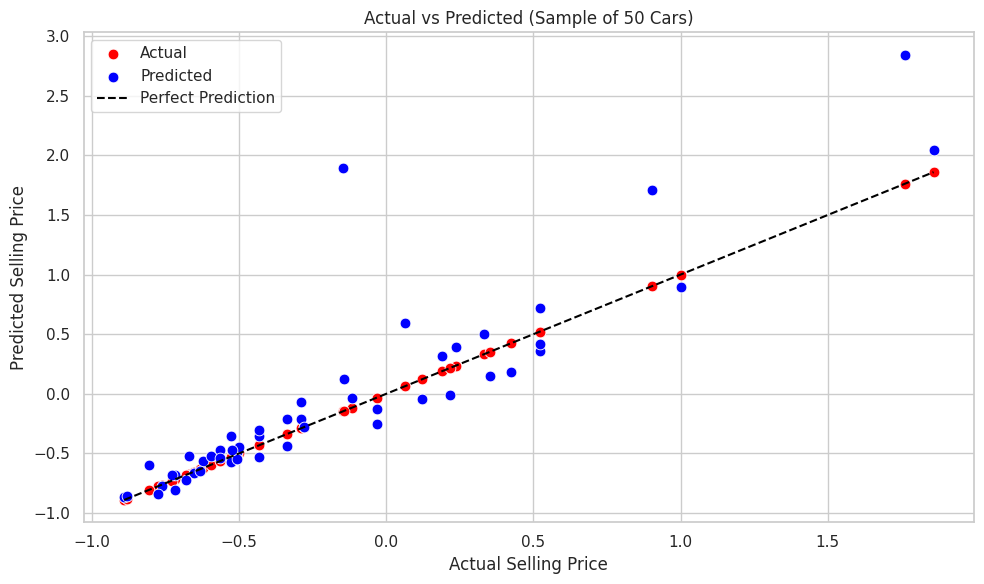

In [ ]:
# Sample 50 from test set
sample_size = min(50, len(X_test_scaled))
sample_indices = np.random.choice(len(X_test_scaled), size=sample_size, replace=False)

# Actual and predicted for sample
y_sample_actual = y_test.reset_index(drop=True).iloc[sample_indices]
y_sample_pred = best_model_object.predict(X_test_scaled[sample_indices])

# Create DataFrame for plotting
df_sample = pd.DataFrame({
    'Actual': y_sample_actual.values,
    'Predicted': y_sample_pred
})

# Plot
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')

# Actual values in red
sns.scatterplot(data=df_sample, x='Actual', y='Actual', color='red', s=60, label='Actual')

# Predicted values in blue
sns.scatterplot(data=df_sample, x='Actual', y='Predicted', color='blue', s=60, label='Predicted')

# Optional: Ideal prediction line
sns.lineplot(x=[df_sample['Actual'].min(), df_sample['Actual'].max()],
             y=[df_sample['Actual'].min(), df_sample['Actual'].max()],
             color='black', linestyle='--', label='Perfect Prediction')

plt.title('Actual vs Predicted (Sample of 50 Cars)')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**Conclusion**

The **Random Forest Regressor is the best-performing model for this task, achieving the highest Test R² of 0.931.** This means the model can explain over 93% of the variance in the used car prices on the test set.

This high accuracy demonstrates that a combination of features like car_age, mileage, fuel_type, and engine size are excellent predictors of a used car's selling price. The final plot of actual vs. predicted prices visually confirms the model's strong performance, with predictions closely aligning with the true values.
